Import Libraries and read Data file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/MatchPercentagePrediction_HE/data.csv")

In [ ]:
data.shape

(2001, 22)

In [ ]:
data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city


Check for null values

In [ ]:
data.isnull().sum()

user_id                0
username               0
age                    0
status                 0
sex                    0
orientation            0
drinks                 0
drugs                  0
height                 0
job                    0
location               0
pets                   0
smokes                 0
language               0
new_languages          0
body_profile           0
education_level        0
dropped_out            0
bio                    0
interests              0
other_interests        0
location_preference    0
new_str                0
dtype: int64

In [ ]:
data.location.value_counts()

san francisco, california    911
oakland, california          250
berkeley, california         146
san mateo, california         56
palo alto, california         45
                            ... 
moss beach, california         1
montara, california            1
brisbane, california           1
woodside, california           1
brooklyn, new york             1
Name: location, Length: 70, dtype: int64

Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


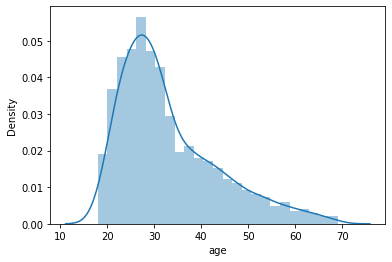

In [ ]:
sns.distplot(data.age)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


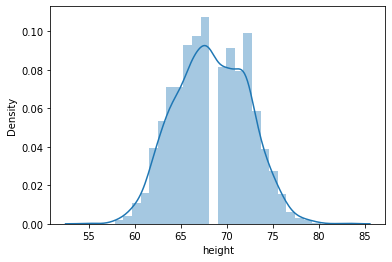

In [ ]:
sns.distplot(data.height)
plt.show()

Handle 'bio' field using TfidfVectorizer and append the resulting dataframe to original

In [ ]:
data.bio[1]

'i\'m a straightforward, genuine, fun loving (i\'m not as serious as my profile may make me out to be), grounded guy that will bend over backwards for those i care for, but am not a pushover. i love simple things like a night in being little spoon, grabbing a bite to eat with friends, watching tv and vegging out with friends until we decide to do something. i love being active outdoors enjoying the sun and fresh air, as well. i am a filipino-german hybrid (i identify as pacific islander and caucasian - not asian- the best way to stick your foot in your mouth is by calling me asian) also call myself a hapa, born and raised in california, 5\'8", 128lbs, dark blonde hair (who knew right?) and green eyes, svelte-dancer build, enjoys his cocktails, am a non-smoker and doesnt\'t do drugs, bottom only (i include this because it does matter in the grand scheme of a relationship- i don\'t like topping), i\'m sassy, straightforward, intelligent, down to earth, fun loving, driven, tactile, sexual

In [ ]:
len(data)

Change column name 'job' to 'occupation' to prevent column duplication

In [ ]:
data = data.rename(columns={"job": "occupation"})

Extract only Adjectives and Nouns to match with fellow users as they provide the most important information

In [ ]:
import spacy
import re
nlp = spacy.load('en')
for i in range(0,len(data)):
  doc = nlp(data.bio[i])
  adj = []
  for _,token in enumerate(doc):
    if token.pos_ == 'ADJ' or token.pos_ == 'NOUN':
      adj.append(str(token))
  data.at[i,'new_str'] = ' '.join(set(adj))
  print("Done : ", i)

Done :  0
Done :  1
Done :  2
Done :  3
Done :  4
Done :  5
Done :  6
Done :  7
Done :  8
Done :  9
Done :  10
Done :  11
Done :  12
Done :  13
Done :  14
Done :  15
Done :  16
Done :  17
Done :  18
Done :  19
Done :  20
Done :  21
Done :  22
Done :  23
Done :  24
Done :  25
Done :  26
Done :  27
Done :  28
Done :  29
Done :  30
Done :  31
Done :  32
Done :  33
Done :  34
Done :  35
Done :  36
Done :  37
Done :  38
Done :  39
Done :  40
Done :  41
Done :  42
Done :  43
Done :  44
Done :  45
Done :  46
Done :  47
Done :  48
Done :  49
Done :  50
Done :  51
Done :  52
Done :  53
Done :  54
Done :  55
Done :  56
Done :  57
Done :  58
Done :  59
Done :  60
Done :  61
Done :  62
Done :  63
Done :  64
Done :  65
Done :  66
Done :  67
Done :  68
Done :  69
Done :  70
Done :  71
Done :  72
Done :  73
Done :  74
Done :  75
Done :  76
Done :  77
Done :  78
Done :  79
Done :  80
Done :  81
Done :  82
Done :  83
Done :  84
Done :  85
Done :  86
Done :  87
Done :  88
Done :  89
Done :  90
Done :  9

Vectorize the new column **'new_str'** with Adjectives and Nouns using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, strip_accents='unicode', analyzer='word', max_features=100, token_pattern='\w{1,}', ngram_range=(1,2), stop_words='english')

In [ ]:
tfv_matrix = tfv.fit_transform(data['new_str'])

In [ ]:
tfv.get_feature_names()

['active',
 'adventure',
 'amazing',
 'area',
 'art',
 'beach',
 'best',
 'better',
 'big',
 'bit',
 'career',
 'city',
 'college',
 'company',
 'conversation',
 'country',
 'creative',
 'day',
 'days',
 'different',
 'earth',
 'easy',
 'family',
 'favorite',
 'food',
 'free',
 'friend',
 'friends',
 'fun',
 'funny',
 'games',
 'girl',
 'good',
 'great',
 'guy',
 'happy',
 'hard',
 'heart',
 'hiking',
 'home',
 'honest',
 'humor',
 'important',
 'intelligent',
 'interested',
 'interesting',
 'interests',
 'job',
 'kind',
 'life',
 'life open',
 'little',
 'long',
 'lot',
 'love',
 'loyal',
 'man',
 'mind',
 'minded',
 'movies',
 'music',
 'nature',
 'new',
 'new life',
 'nice',
 'night',
 'old',
 'open',
 'partner',
 'passionate',
 'people',
 'person',
 'place',
 'places',
 'positive',
 'profile',
 'real',
 'relationship',
 'right',
 'school',
 'self',
 'sense',
 'shy',
 'smart',
 'social',
 'sports',
 'strong',
 'stuff',
 'thing',
 'things',
 'time',
 'times',
 'type',
 'way',
 'wine'

In [ ]:
tfv_matrix.todense().shape

(2001, 100)

Convert the Vectorized matrix to Dataframe and concatenate with the original dataframe

In [ ]:
bio_df = pd.DataFrame(tfv_matrix.toarray())

Set column names as the feature_names of the TfidfVectorizer

In [ ]:
bio_df.columns = tfv.get_feature_names()

In [ ]:
bio_df = bio_df.round(2).head()

In [ ]:
data = pd.concat([data, bio_df], axis=1)

In [ ]:
data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,occupation,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference,new_str,active,adventure,amazing,area,art,beach,best,better,big,bit,career,city,college,company,conversation,country,creative,...,nice,night,old,open,partner,passionate,people,person,place,places,positive,profile,real,relationship,right,school,self,sense,shy,smart,social,sports,strong,stuff,thing,things,time,times,type,way,wine,woman,work,world,year,years,likes_dogs,likes_cats,town,state
0,fffe3100,Edith Lopez,27,single,f,gay,socially,0.0,66.0,health,"oakland, california",likes dogs and likes cats,0.0,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state,free day earth care butch new life open line p...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.26,0.0,0.0,0.17,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.18,0.00,0.0,0.00,0.25,0.0,0.31,0.0,0.00,0.0,0.0,1.0,1.0,oakland,california
1,fffe3200,Travis Young,26,single,m,gay,socially,0.0,68.0,other,"pleasant hill, california",likes dogs,0.0,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere,general charge best little drugs vers responsi...,0.20,0.0,0.0,0.16,0.19,0.0,0.18,0.0,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.21,0.0,0.00,0.0,0.0,0.11,0.00,0.0,0.0,0.0,0.21,0.0,0.38,0.0,0.00,0.00,0.0,0.0,0.0,0.21,0.0,0.0,0.0,0.0,0.12,0.12,0.0,0.22,0.17,0.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0,pleasant hill,california
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,0.5,69.0,other,"oakland, california",has dogs and likes cats,0.5,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city,pink free day site most favorite spirit friend...,0.29,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.17,0.21,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.27,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.18,0.17,0.0,0.00,0.00,0.0,0.00,0.0,0.24,0.0,0.0,1.0,1.0,oakland,california
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,0.5,68.0,tech,"daly city, california",likes dogs and likes cats,0.0,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city,gear image geek obsession portrait gigantic ne...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.67,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.0,1.0,daly city,california
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,0.5,68.0,other,"oakland, california",likes dogs and likes cats,1.0,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city,whisper time wind tide demise own curls sands ...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.0,1.0,oakland,california


Fill null values as 0

In [ ]:
data = data.fillna(0.0)

In [ ]:
data.isnull().sum().any()

False

Data Preprocessing

Provide numerical value to the columns depending on the degree to which they are practiced

In [ ]:
data.drugs.value_counts()

never        1586
sometimes     397
often          18
Name: drugs, dtype: int64

In [ ]:
data['drugs'] = data['drugs'].replace({"never": 0, "sometimes": 0.5, "often": 1 })

In [ ]:
data.smokes.value_counts()

no                1630
sometimes          128
yes                 94
when drinking       91
trying to quit      58
Name: smokes, dtype: int64

In [ ]:
data['smokes'] = data['smokes'].replace({"no": 0, "sometimes": 0.5, "yes": 1, "when drinking": 0.5, "trying to quit" : 0.25})

In [93]:
data.drinks.value_counts()

socially       1393
rarely          256
often           168
not at all      157
very often       16
desperately      11
Name: drinks, dtype: int64

In [94]:
data['drinks'] = data['drinks'].replace({"socially": 0.5, "rarely": 0.25, "often": 0.75, "not at all": 0.0, "very often" : 1, "desperately": 1})

In [ ]:
data['new_languages'] = data['new_languages'].replace({"not interested": 0, "interested": 1, "somewhat interested": 0.5})

In [ ]:
data.new_languages.value_counts()

0.0    1050
1.0     633
0.5     318
Name: new_languages, dtype: int64

Set 'Yes' to 1 and 'No' to 0, where required

In [97]:
data['dropped_out'] = data['dropped_out'].replace({"yes": 1, "no": 0})

In [ ]:
data.pets.value_counts()

In [ ]:
data['dropped_out'] = data['dropped_out'].replace({"yes": 1.0, "no": 0.0})

In [ ]:
data.dropped_out.value_counts()

no     1898
yes     103
Name: dropped_out, dtype: int64

Create a separate column for cat lovers and dog lovers

In [ ]:
for i in range(0, len(data)):
  if 'likes dogs' in data.pets[i] or 'has dogs' in data.pets[i]:
    data.at[i, 'likes_dogs'] = 1
  else:
    data.at[i, 'likes_dogs'] = 0
  if 'likes cats' in data.pets[i] or 'has cats' in data.pets[i]:
    data.at[i, 'likes_cats'] = 1
  else:
    data.at[i, 'likes_cats'] = 0
  print("Done : ", i)

In [ ]:
data.occupation.value_counts()

finance           414
tech              319
other             286
art               254
student           226
health            158
education         131
legal              54
travel             46
government         33
transportation     22
retired            18
rather not say     17
unemployed         16
military            7
Name: occupation, dtype: int64

In [ ]:
data.status.value_counts()

single            1867
available           66
seeing someone      54
married             14
Name: status, dtype: int64

Reduce the number of occupation categories by combining similar categories

In [ ]:
data['occupation'] = data['occupation'].replace({"artistic / musical / writer": "art", "science / tech / engineering": "tech", "medicine / health": "health",
                            "computer / hardware / software": "tech", "sales / marketing / biz dev": "finance", "education / academia": "education",
                            "executive / management": "finance", "banking / financial / real estate": "finance", "entertainment / media": "art",
                            "law / legal services": "legal", "construction / craftsmanship": "finance", "hospitality / travel": "travel",
                            "clerical / administrative": "finance", "political / government": "government" })

Reduce the number of occupation categories by combining similar categories

In [ ]:
data['body_profile'] = data['body_profile'].replace({"athletic": "fit", "curvy": "fit", "a little extra": "overweight", "skinny": "thin", 
                                                       "full figured" : "overweight", "used up" : "thin", "jacked": "fit", "rather not say": "average"})

In [ ]:
data.body_profile.value_counts()

fit           1010
average        567
thin           246
overweight     178
Name: body_profile, dtype: int64

Separate location field to 'town' and 'state'

In [ ]:
data.location.value_counts()

san francisco, california    911
oakland, california          250
berkeley, california         146
san mateo, california         56
palo alto, california         45
                            ... 
moss beach, california         1
montara, california            1
brisbane, california           1
woodside, california           1
brooklyn, new york             1
Name: location, Length: 70, dtype: int64

In [ ]:
for i in range(0, len(data)):
  data.at[i, 'town'] = data.location[i].split(",")[0].strip()
  data.at[i, 'state'] = data.location[i].split(",")[1].strip()
  print("Done : ", i)

In [ ]:
data.city

0             oakland
1       pleasant hill
2             oakland
3           daly city
4             oakland
            ...      
1996          oakland
1997    san francisco
1998    pleasant hill
1999    san francisco
2000          oakland
Name: city, Length: 2001, dtype: object

Create separate column for languages (ignoring the level of fluency)

In [ ]:
import re
x = []
for i in range(0, len(data)):
  lang = data.language[i]
  x = re.sub(r'\([^)]*\)', '', lang)
  lang_list = x.split(',')
  for l in lang_list:
    data.at[i, l] = 1
  print("Done : ", i)

Replace null values in the new language columns by 0

In [ ]:
data = data.fillna(0.0)

Use values from hobbies and other_interests to create separate columns, this way we avoid duplicate column names from both the original columns

In [ ]:
data.columns.values[19] = "hobbies"

In [ ]:
data['hobbies'].value_counts()

In [ ]:
for i in range(0, len(data)):
  data.at[i, data['hobbies'][i]] = 1
  data.at[i, data['other_interests'][i]] = 1
  print("Done : ", i)

To check if there are duplicate column names

In [ ]:
import collections
print(collections.Counter(data.columns.values))

Counter({'user_id': 1, 'username': 1, 'age': 1, 'status': 1, 'sex': 1, 'orientation': 1, 'drinks': 1, 'drugs': 1, 'height': 1, 'occupation': 1, 'location': 1, 'pets': 1, 'smokes': 1, 'language': 1, 'new_languages': 1, 'body_profile': 1, 'education_level': 1, 'dropped_out': 1, 'bio': 1, 'hobbies': 1, 'other_interests': 1, 'location_preference': 1, 'new_str': 1, 'active': 1, 'adventure': 1, 'amazing': 1, 'area': 1, 'art': 1, 'beach': 1, 'best': 1, 'better': 1, 'big': 1, 'bit': 1, 'career': 1, 'city': 1, 'college': 1, 'company': 1, 'conversation': 1, 'country': 1, 'creative': 1, 'day': 1, 'days': 1, 'different': 1, 'earth': 1, 'easy': 1, 'family': 1, 'favorite': 1, 'food': 1, 'free': 1, 'friend': 1, 'friends': 1, 'fun': 1, 'funny': 1, 'games': 1, 'girl': 1, 'good': 1, 'great': 1, 'guy': 1, 'happy': 1, 'hard': 1, 'heart': 1, 'hiking': 1, 'home': 1, 'honest': 1, 'humor': 1, 'important': 1, 'intelligent': 1, 'interested': 1, 'interesting': 1, 'interests': 1, 'job': 1, 'kind': 1, 'life': 1, '

In [ ]:
data.location_preference.value_counts()

same_city     1169
same_state     495
anywhere       337
Name: location_preference, dtype: int64

Saving the file for later use (can be read directly)

In [99]:
data.to_csv("/content/drive/My Drive/Colab Notebooks/data/MatchPercentagePrediction_HE/temp_preprocessed_data.csv")

In [ ]:
data.head()

Create a separate dataframe consisting of sex, orientation and user_id

In [61]:
sexual_orientation_df = data[['user_id','sex','orientation']]

In [64]:
sexual_orientation_df.head(10)

,user_id,sex,orientation
0,fffe3100,f,g
1,fffe3200,m,g
2,fffe3300,f,b
3,fffe3400,m,b
4,fffe3500,f,b
5,fffe3600,m,b
6,fffe3700,f,g
7,fffe3800,m,s
8,fffe3900,m,g
9,fffe31003000,m,s


In [32]:
sexual_orientation_df.sex.value_counts()

m    1139
f     862
Name: sex, dtype: int64

In [65]:
sexual_orientation_df.orientation.value_counts()

s    1736
g     153
b     112
Name: orientation, dtype: int64

In [63]:
sexual_orientation_df['orientation'] = sexual_orientation_df['orientation'].replace({"straight": "s", "gay": "g", "bisexual": "b"})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Create a new column 'compatibility', it represents sex and orientation

In [66]:
sexual_orientation_df['compatibility'] = sexual_orientation_df['sex'] + sexual_orientation_df['orientation']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
sexual_orientation_df.compatibility.value_counts()

ms    998
fs    738
mg    113
fb     84
fg     40
mb     28
Name: compatibility, dtype: int64

It is important the 


*   straight people are matched with straight people of the opposite gender (includes bisexuals of opposite gender)
*   gay people are matched with gay people of same gender(includes bisexuals of same gender)
*   bisexuals with other bisexuals of both genders(includes gays of same sex and straight people of opposite gender)

Creating a list with possible sexual compatibilities

In [82]:
sexual_compatibility_list = [('ms','fs'), ('ms','fb'), 
                             ('fs','ms'), ('fs','mb'), 
                             ('mg','mg'), ('mg','mb'), 
                             ('fg','fg'), ('fg','fb'), 
                             ('mb','fs'), ('mb','mg'), ('mb','fb'), ('mb','mb'),
                             ('fb','ms'), ('fb','fg'), ('fb','mb'), ('fb','fb'),]

In [83]:
if ('ms','mg') in no_sexual_compatibility_list:
  print(1)

In [69]:
sexual_orientation_df.loc[sexual_orientation_df['user_id']=='fffe3900', 'compatibility'].iloc[0]

'mg'

In [71]:
if sexual_orientation_df.loc[sexual_orientation_df['user_id']==current_id, 'orientation'].iloc[0] != 's':
  print(1)

1


Create a new dataframe for every user_id where user_ids with possible matches are set as 1 and others as 0

In [88]:
sexual_matches_df = pd.DataFrame()
for i in range(0,sexual_orientation_df.shape[0]):
  current_id = sexual_orientation_df.user_id[i]
  compatibility1 = sexual_orientation_df.loc[sexual_orientation_df['user_id']==current_id, 'compatibility'].iloc[0]
  sexual_matches_df.at[i, 'user_id'] = current_id
  for id in sexual_orientation_df.user_id.values:
    if id == current_id:
      sexual_matches_df.at[i, id] = 0
    else:
      compatibility2 = sexual_orientation_df.loc[sexual_orientation_df['user_id']==id, 'compatibility'].iloc[0]
      if (compatibility1, compatibility2) in sexual_compatibility_list:
        sexual_matches_df.at[i,id] = 1
      else:
        sexual_matches_df.at[i, id] = 0
  print("Done for ", i)

Done for  0
Done for  1
Done for  2
Done for  3
Done for  4
Done for  5
Done for  6
Done for  7
Done for  8
Done for  9
Done for  10
Done for  11
Done for  12
Done for  13
Done for  14
Done for  15
Done for  16
Done for  17
Done for  18
Done for  19
Done for  20
Done for  21
Done for  22
Done for  23
Done for  24
Done for  25
Done for  26
Done for  27
Done for  28
Done for  29
Done for  30
Done for  31
Done for  32
Done for  33
Done for  34
Done for  35
Done for  36
Done for  37
Done for  38
Done for  39
Done for  40
Done for  41
Done for  42
Done for  43
Done for  44
Done for  45
Done for  46
Done for  47
Done for  48
Done for  49
Done for  50
Done for  51
Done for  52
Done for  53
Done for  54
Done for  55
Done for  56
Done for  57
Done for  58
Done for  59
Done for  60
Done for  61
Done for  62
Done for  63
Done for  64
Done for  65
Done for  66
Done for  67
Done for  68
Done for  69
Done for  70
Done for  71
Done for  72
Done for  73
Done for  74
Done for  75
Done for  76
Done for 

The new dataframe looks like this:

In [87]:
sexual_matches_df.head()

,user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,...,fffe3100390036003200,fffe3100390036003300,fffe3100390036003400,fffe3100390036003500,fffe3100390036003600,fffe3100390036003700,fffe3100390036003800,fffe3100390036003900,fffe3100390037003000,fffe3100390037003100,fffe3100390037003200,fffe3100390037003300,fffe3100390037003400,fffe3100390037003500,fffe3100390037003600,fffe3100390037003700,fffe3100390037003800,fffe3100390037003900,fffe3100390038003000,fffe3100390038003100,fffe3100390038003200,fffe3100390038003300,fffe3100390038003400,fffe3100390038003500,fffe3100390038003600,fffe3100390038003700,fffe3100390038003800,fffe3100390038003900,fffe3100390039003000,fffe3100390039003100,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
0,fffe3100,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,fffe3200,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fffe3300,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,fffe3400,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,fffe3500,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


Saving again for future use

In [89]:
sexual_matches_df.to_csv("/content/drive/My Drive/Colab Notebooks/data/MatchPercentagePrediction_HE/temp_sexual_matches_df.csv")

In [4]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/MatchPercentagePrediction_HE/temp_preprocessed_data.csv")
sexual_matches_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/MatchPercentagePrediction_HE/temp_sexual_matches_df.csv")
data = data.drop('Unnamed: 0', axis=1)
sexual_matches_df = sexual_matches_df.drop('Unnamed: 0', axis=1)

Model Training

In [90]:
data.shape, sexual_matches_df.shape

((2001, 246), (2001, 2002))

In [98]:
data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,occupation,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,hobbies,other_interests,location_preference,new_str,active,adventure,amazing,area,art,beach,best,better,big,bit,career,city,college,company,conversation,country,creative,...,gujarati,romanian,tibetan,c++,armenian,farsi,lisp,malay,hungarian,ilongo,persian,swahili,yiddish,instruments,painting,dancing,sketching,acting,craft,designing,video games,collectibles,photography,yoga,writting,diy,singing,gardening,makeup,astronomy,fishing,organising events,studying,social_networking,reading,cooking,politics,calligraphy,travelling,camping
0,fffe3100,Edith Lopez,27,single,f,gay,0.50,0.0,66.0,health,"oakland, california",likes dogs and likes cats,0.0,"english (fluently), spanish (poorly), sign lan...",1.0,fit,4.0,0,bottom line i love life! i work hard and i lov...,sports,instruments,same_state,free day earth care butch new life open line p...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fffe3200,Travis Young,26,single,m,gay,0.50,0.0,68.0,other,"pleasant hill, california",likes dogs,0.0,"english (fluently), tagalog (okay), french (po...",1.0,fit,3.0,0,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere,general charge best little drugs vers responsi...,0.20,0.0,0.0,0.16,0.19,0.0,0.18,0.0,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,0.50,0.5,69.0,other,"oakland, california",has dogs and likes cats,0.5,"english (fluently), sign language (poorly), fr...",1.0,fit,2.0,0,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same_city,pink free day site most favorite spirit friend...,0.29,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,fffe3400,Salvador Klaver,27,single,m,bisexual,0.50,0.5,68.0,tech,"daly city, california",likes dogs and likes cats,0.0,english,0.0,average,3.0,0,i'm a stealth geek. that special mix of techni...,sketching,acting,same_city,gear image geek obsession portrait gigantic ne...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fffe3500,Elana Sewell,22,single,f,bisexual,0.75,0.5,68.0,other,"oakland, california",likes dogs and likes cats,1.0,english,0.0,average,2.0,1,with the whisper of the wind i was weaved into...,craft,designing,same_city,whisper time wind tide demise own curls sands ...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One-Hot Encoding the categorical columns

In [102]:
train = pd.get_dummies(data=data, columns=['status','occupation','body_profile','town','state'])

Drop the irrelevant columns and columns from where the required data has already been extracted in previous steps

In [104]:
train = train.drop(['user_id','username','sex','orientation','location','pets','language','bio','hobbies','other_interests','location_preference','new_str'], axis=1)

Use cosine_similarity, it considers each record as a vector in n-dimensional space and calculates the dot product of both the vectors

In [142]:
from sklearn.metrics.pairwise import cosine_similarity
result = cosine_similarity(train)

Convert the array with cosine_similarities to dataframe

In [143]:
result_df = pd.DataFrame(result, columns=temp_sexual_matches.columns)

In [144]:
temp_sexual_matches = sexual_matches_df.drop(['user_id'], axis=1)

This is how both the dataframes look:

In [117]:
temp_sexual_matches.head()

,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,fffe34003000,...,fffe3100390036003200,fffe3100390036003300,fffe3100390036003400,fffe3100390036003500,fffe3100390036003600,fffe3100390036003700,fffe3100390036003800,fffe3100390036003900,fffe3100390037003000,fffe3100390037003100,fffe3100390037003200,fffe3100390037003300,fffe3100390037003400,fffe3100390037003500,fffe3100390037003600,fffe3100390037003700,fffe3100390037003800,fffe3100390037003900,fffe3100390038003000,fffe3100390038003100,fffe3100390038003200,fffe3100390038003300,fffe3100390038003400,fffe3100390038003500,fffe3100390038003600,fffe3100390038003700,fffe3100390038003800,fffe3100390038003900,fffe3100390039003000,fffe3100390039003100,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [141]:
result_df.head()

,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,fffe34003000,...,fffe3100390036003200,fffe3100390036003300,fffe3100390036003400,fffe3100390036003500,fffe3100390036003600,fffe3100390036003700,fffe3100390036003800,fffe3100390036003900,fffe3100390037003000,fffe3100390037003100,fffe3100390037003200,fffe3100390037003300,fffe3100390037003400,fffe3100390037003500,fffe3100390037003600,fffe3100390037003700,fffe3100390037003800,fffe3100390037003900,fffe3100390038003000,fffe3100390038003100,fffe3100390038003200,fffe3100390038003300,fffe3100390038003400,fffe3100390038003500,fffe3100390038003600,fffe3100390038003700,fffe3100390038003800,fffe3100390038003900,fffe3100390039003000,fffe3100390039003100,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [111]:
result.shape, temp_sexual_matches.shape

((2001, 2001), (2001, 2001))

Create a final dataframe by elementwise multiplying both the dataframes, as a result of which only cosine similarities of possible matches remain and others are 0

In [145]:
final_df = pd.concat([data[['user_id']], pd.DataFrame(result_df.values*temp_sexual_matches.values, columns=temp_sexual_matches.columns)],axis=1)

In [146]:
final_df.head()

,user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,...,fffe3100390036003200,fffe3100390036003300,fffe3100390036003400,fffe3100390036003500,fffe3100390036003600,fffe3100390036003700,fffe3100390036003800,fffe3100390036003900,fffe3100390037003000,fffe3100390037003100,fffe3100390037003200,fffe3100390037003300,fffe3100390037003400,fffe3100390037003500,fffe3100390037003600,fffe3100390037003700,fffe3100390037003800,fffe3100390037003900,fffe3100390038003000,fffe3100390038003100,fffe3100390038003200,fffe3100390038003300,fffe3100390038003400,fffe3100390038003500,fffe3100390038003600,fffe3100390038003700,fffe3100390038003800,fffe3100390038003900,fffe3100390039003000,fffe3100390039003100,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
0,fffe3100,0.000000,0.00000,0.992927,0.000000,0.995087,0.000000,0.978264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.982582,0.967419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.986175,0.000000,0.000000,0.000000,0.000000,0.998331,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996316,0.000000,0.000000,0.000000
1,fffe3200,0.000000,0.00000,0.000000,0.998240,0.000000,0.995051,0.000000,0.000000,0.998292,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998071,0.997591,0.000000,0.000000,0.000000,0.000000,0.998584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.993593,0.998120,0.000000,0.000000,0.998383,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.974874,0.000000,0.997328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,fffe3300,0.992927,0.00000,0.000000,0.993413,0.997882,0.998448,0.951161,0.958381,0.000000,0.987743,0.000000,0.000000,0.993581,0.00000,0.000000,0.980829,0.990814,0.000000,0.906209,0.997317,0.000000,0.000000,0.000000,0.996115,0.000000,0.000000,0.994097,0.000000,0.958138,0.935630,0.983295,0.000000,0.987734,0.000000,0.000000,0.000000,0.991000,0.996282,0.000000,...,0.000000,0.998341,0.998166,0.00000,0.993263,0.000000,0.000000,0.000000,0.997744,0.00000,0.000000,0.000000,0.000000,0.000000,0.990135,0.983897,0.000000,0.991032,0.000000,0.964281,0.000000,0.994173,0.996672,0.000000,0.989273,0.000000,0.957861,0.00000,0.997837,0.000000,0.000000,0.992559,0.000000,0.000000,0.952316,0.996951,0.997343,0.993852,0.986248,0.000000
3,fffe3400,0.000000,0.99824,0.993413,0.000000,0.996651,0.993864,0.000000,0.000000,0.997768,0.000000,0.958845,0.998291,0.000000,0.99466,0.985738,0.000000,0.000000,0.998704,0.000000,0.997756,0.997129,0.998522,0.997799,0.000000,0.997999,0.998225,0.000000,0.998323,0.980653,0.965180,0.000000,0.987933,0.000000,0.992223,0.998473,0.994294,0.000000,0.998166,0.998792,...,0.998442,0.000000,0.000000,0.99237,0.000000,0.981681,0.977661,0.956705,0.000000,0.99895,0.995915,0.997276,0.998131,0.914338,0.000000,0.000000,0.99566

In [132]:
final_df.to_csv('submission1.csv')

In [105]:
train.head()

,age,drinks,drugs,height,smokes,new_languages,education_level,dropped_out,active,adventure,amazing,area,art,beach,best,better,big,bit,career,city,college,company,conversation,country,creative,day,days,different,earth,easy,family,favorite,food,free,friend,friends,fun,funny,games,girl,...,town_moss beach,town_mountain view,town_nha trang,town_north hollywood,town_novato,town_oakland,town_orinda,town_pacifica,town_palo alto,town_petaluma,town_phoenix,town_pinole,town_pleasant hill,town_point richmond,town_redwood city,town_richmond,town_rodeo,town_san anselmo,town_san bruno,town_san carlos,town_san francisco,town_san leandro,town_san lorenzo,town_san mateo,town_san pablo,town_san rafael,town_santa rosa,town_sausalito,town_south san francisco,town_stanford,town_stockton,town_vallejo,town_walnut creek,town_woodacre,town_woodside,state_arizona,state_california,state_new york,state_ohio,state_vietnam
0,27,0.50,0.0,66.0,0.0,1.0,4.0,0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,0.0,0.00,0.33,0.00,0.0,0.00,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,26,0.50,0.0,68.0,0.0,1.0,3.0,0,0.20,0.0,0.0,0.16,0.19,0.0,0.18,0.0,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.21,0.22,0.00,0.0,0.00,0.0,0.00,0.00,0.13,0.13,0.0,0.0,0.19,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,20,0.50,0.5,69.0,0.5,1.0,2.0,0,0.29,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.26,0.0,0.00,0.00,0.28,0.0,0.31,0.0,0.29,0.29,0.18,0.00,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,27,0.50,0.5,68.0,0.0,0.0,3.0,0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,22,0.75,0.5,68.0,1.0,0.0,2.0,1,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


------------Random--------------

In [92]:
data.drinks.value_counts()

socially       1393
rarely          256
often           168
not at all      157
very often       16
desperately      11
Name: drinks, dtype: int64

In [91]:
data.status.value_counts()

single            1867
available           66
seeing someone      54
married             14
Name: status, dtype: int64

In [10]:
data.town.value_counts()

san francisco       911
oakland             250
berkeley            146
san mateo            56
palo alto            45
                   ... 
phoenix               1
point richmond        1
hacienda heights      1
stockton              1
brisbane              1
Name: town, Length: 70, dtype: int64

In [ ]:
data['location_preference'] = data['location_preference'].replace({"same city": "same_city", "same state": "same_state"})

In [ ]:
data.language

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

tfv_sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
tfv_sig

In [ ]:
sorted(list(enumerate(tfv_sig[1])), key=lambda x:x[1], reverse=True)

In [ ]:
tfv_matrix.toarray().shape

(2001, 100)